Importing libraries and setting up environment

In [1]:
import sympy
sympy.init_printing()
import numpy
import pylab
import scipy.optimize
import matplotlib

# Governing Equations

Mass conservation

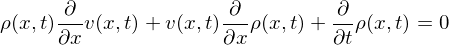

In [2]:
rho = sympy.Function('rho') # Density
v = sympy.Function('v') # Velocity
t = sympy.Symbol('t') # Time
x = sympy.Symbol('x') # Position
mass_conservation = sympy.Eq(sympy.Derivative(rho(x,t), t)+ sympy.Derivative(rho(x,t)*v(x,t),x),0).doit()
mass_conservation

Momentum conservation

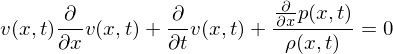

In [3]:
p = sympy.Function('p') # Pressure
momentum_conservation = sympy.Eq(sympy.Derivative(v(x,t),t)+v(x,t)*sympy.Derivative(v(x,t),x)+sympy.Derivative(p(x,t),x)/rho(x,t),0).doit()
momentum_conservation

Entropy conservation

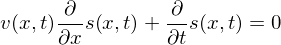

In [4]:
s = sympy.Function('s') # Entropy
entropy_conservation = sympy.Eq(sympy.Derivative(s(x,t),t)+v(x,t)*sympy.Derivative(s(x,t),x),0).doit()
entropy_conservation

Equation of state

In [5]:
gamma = sympy.Symbol('gamma') # Adiabatic index
eos = sympy.Eq(s(x,t), sympy.log(p(x,t))-gamma*sympy.log(rho(x,t)))
eos

# Reduction to dimensionless equations

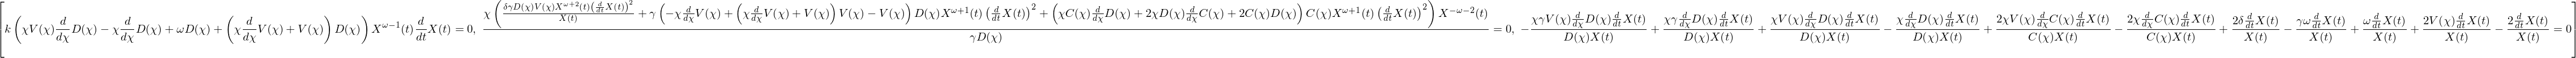

In [6]:
D = sympy.Function('D') # Dimensionless density
k = sympy.Symbol('k', positive=True) # density constant
omega = sympy.Symbol('omega') #density power law paraemter
X = sympy.Function('X') # Position of the shock front
c = sympy.Function('c') # Speed of sound
V = sympy.Function('V') # Dimensionless velocity
C = sympy.Function('C') # Dimensionless speed of sound 
chi = sympy.Symbol('chi') # Dimensionless position
delta = sympy.Symbol('delta', negative=True) # Shock velocity position power law index
temp = [mass_conservation, momentum_conservation, entropy_conservation.subs(eos.lhs,eos.rhs).doit()]
temp = [itm.subs(p(x,t), rho(x,t)*c(x,t)**2/gamma) for itm in temp]
temp = [itm.subs(rho(x,t), k*(X(t)**omega)*D(x/X(t))) for itm in temp] #updated density for stellar atmosphere
temp = [itm.subs(v(x,t), X(t).diff(t)*V(x/X(t))*x/X(t)) for itm in temp]
temp = [itm.subs(c(x,t), X(t).diff(t)*C(x/X(t))*x/X(t)) for itm in temp]
temp = [itm.subs(x, chi*X(t)) for itm in temp]
temp = [itm.doit() for itm in temp]
temp = [itm.simplify() for itm in temp]
temp = [itm.doit() for itm in temp]
temp = [itm.subs(X(t).diff(t,2), delta*X(t).diff(t)**2/X(t)) for itm in temp]
dimensionless_equation = temp
dimensionless_equation

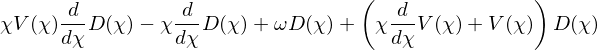

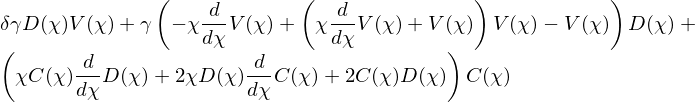

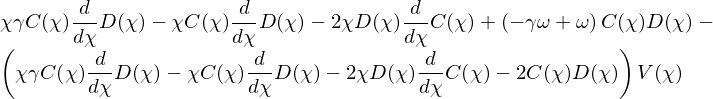

In [7]:
equation1 = D(chi) *(V(chi) + chi* V(chi).diff(chi)) + V(chi) *chi* D(chi).diff(chi) - chi *D(chi).diff(chi) + omega * D(chi)
display(equation1)
equation2 = C(chi)* (2* C(chi)* D(chi) + C(chi) *chi* D(chi).diff(chi) + 2 *D(chi) *chi *C(chi).diff(chi)) + D(chi) *V(chi) *delta *gamma + D(chi) *gamma *(V(chi) *(V(chi) + chi* V(chi).diff(chi)) - V(chi) - chi *V(chi).diff(chi))
display(equation2)
equation3 = (-gamma * omega + omega) * C(chi) * D(chi) + 2* C(chi)* D(chi) + C(chi)* chi *gamma* D(chi).diff(chi)  - V(chi)* (- 2* C(chi)* D(chi) + C(chi)* chi* gamma *D(chi).diff(chi) - C(chi) *chi* D(chi).diff(chi) - 2* D(chi) *chi *C(chi).diff(chi))  - (2 * C(chi)* D(chi) + C(chi) *chi* D(chi).diff(chi) + 2 * D(chi) *chi * C(chi).diff(chi))
display(equation3) 

\left( \left[\begin{matrix}\chi V{\left(\chi \right)} - \chi & \chi D{\left(\chi \right)} & 0\\\chi C^{2}{\left(\chi \right)} & \gamma \left(\chi V{\left(\chi \right)} - \chi\right) D{\left(\chi \right)} & 2 \chi C{\left(\chi \right)} D{\left(\chi \right)}\\\chi \gamma C{\left(\chi \right)} - \chi C{\left(\chi \right)} - \left(\chi \gamma C{\left(\chi \right)} - \chi C{\left(\chi \right)}\right) V{\left(\chi \right)} & 0 & 2 \chi D{\left(\chi \right)} V{\left(\chi \right)} - 2 \chi D{\left(\chi \right)}\end{matrix}\right], \  \left[\begin{matrix}- \omega D{\left(\chi \right)} - D{\left(\chi \right)} V{\left(\chi \right)}\\- \delta \gamma D{\left(\chi \right)} V{\left(\chi \right)} - \gamma \left(V^{2}{\left(\chi \right)} - V{\left(\chi \right)}\right) D{\left(\chi \right)} - 2 C^{2}{\left(\chi \right)} D{\left(\chi \right)}\\- \left(- \gamma \omega + \omega\right) C{\left(\chi \right)} D{\left(\chi \right)} - 2 C{\left(\chi \right)} D{\left(\chi \right)} V{\left(\chi \right)}\end{matri

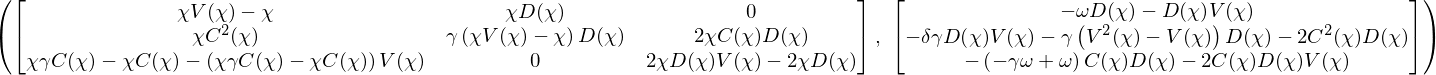

In [8]:
temp = [equation1, equation2, equation3]
d = sympy.Symbol('d')
v = sympy.Symbol('v')
c = sympy.Symbol('c')

temp = [itm.subs(D(chi).diff(chi), d).subs(V(chi).diff(chi), v).subs(C(chi).diff(chi), c) for itm in temp]
temp
print(sympy.latex(sympy.linear_eq_to_matrix(temp, [d, v, c])))
display(sympy.linear_eq_to_matrix(temp, [d, v, c]))

solving for the derivatives

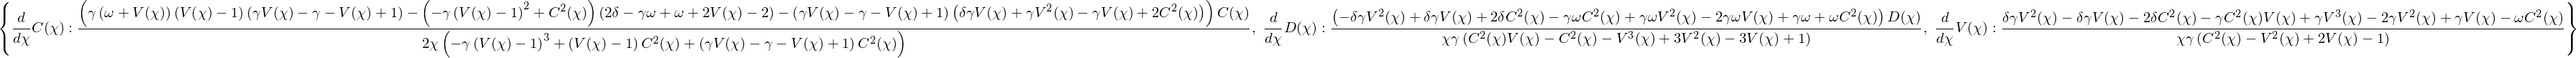

In [9]:
dimles_derivatives = sympy.solve(dimensionless_equation, [v(chi).diff(chi) for v in [D,C,V]])
dimles_derivatives

Safe places to cross the sonic line

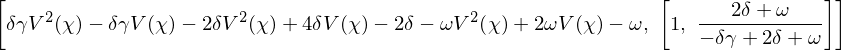

In [10]:
temp = V(chi).diff(chi).subs(dimles_derivatives)
temp = sympy.fraction(temp)[0]
temp = temp.subs(C(chi), 1-V(chi)).simplify()
#temp = temp.subs(omega, 1/(gamma - 1)) this still doesn't give a good substitution...
[temp, sympy.solve(temp, V(chi))] #looks ugly

Formulas for V_shock, C_shock: LONGER NOW...

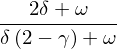

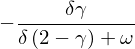

In [11]:
V_sonic = (2 *delta + omega)/(delta*(2-gamma) + omega)
C_sonic = -delta * gamma/(delta*(2-gamma) + omega)
display(V_sonic)
display(C_sonic)

It is possible to reduce these ODEs in $\chi$ to just one ode of $C$ vs $V$

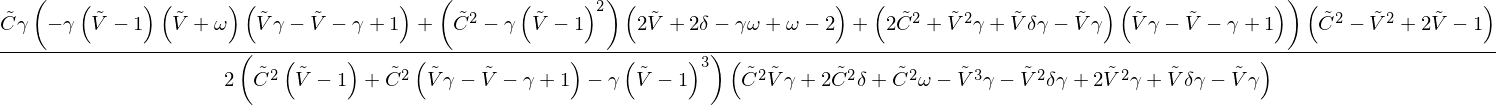

In [12]:
V_tilde = sympy.Symbol(r'\tilde{V}')
C_tilde = sympy.Symbol(r'\tilde{C}')
temp = C(chi).diff(chi)/V(chi).diff(chi)
temp = temp.subs(dimles_derivatives)
temp = temp.subs(V(chi), V_tilde)
temp = temp.subs(C(chi), C_tilde)
temp = temp.simplify()
dCdV = temp
dCdV

Slope at the safe sonic point crossing

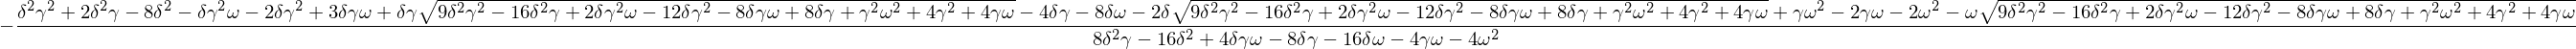

In [13]:
alpha = sympy.Symbol('alpha', positive=True) # Slope
DeltaV = sympy.Symbol(r'\Delta V', positive=True)
temp = dCdV.subs(C_tilde,C_sonic+alpha*DeltaV)
temp = temp.subs(V_tilde, V_sonic+DeltaV)
temp = sympy.fraction(temp)
temp = [sympy.diff(temp[0],DeltaV,2).subs(DeltaV,0).simplify(),
        sympy.diff(temp[1],DeltaV,2).subs(DeltaV,0).simplify()]
temp = temp[0]/temp[1]
sonic_line_slope = sympy.solve(alpha-temp,alpha)[1]
sonic_line_slope

Boundary conditions at the shock front

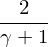

In [14]:
V_shock_front = 2/(gamma+1)
V_shock_front

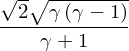

In [15]:
C_shock_front = sympy.sqrt(2*gamma*(gamma-1))/(gamma+1)
C_shock_front

# Shooting method

-6.427185520470886


<IPython.core.display.Javascript object>


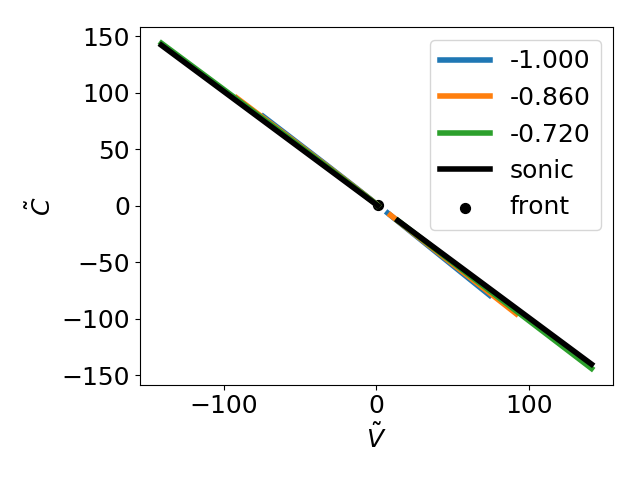

-8.170494687949187
-13.10891178131759


In [51]:
def shoot_from_sonic_point_case_1(dv, gv, ov):
    
    assert(C_sonic.subs({gamma:gv,delta:dv,omega:ov}) < 0)
    
    sonic_slope = sonic_line_slope.subs({gamma:gv,delta:dv,omega:ov})
    dV_init = 1e-6
    V_start = float(V_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init
    C_start = float(C_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init * float(sonic_slope)
    print(C_start)
    v_list = numpy.linspace(V_start, 10*V_start, 10000)
    c_list = C_start*numpy.ones_like(v_list)
    
    deriv = dCdV.subs({gamma:gv,delta:dv, omega:ov})
    wrapper = sympy.lambdify([V_tilde,C_tilde], deriv)
    
    for n in range(1,len(v_list)):
        delta_v = v_list[n] - v_list[n-1]
        c_list[n] = c_list[n-1] + delta_v*wrapper(v_list[n-1], c_list[n-1])
        
    # Continue beyond the portal
    vbc = float(V_shock_front.subs(gamma,gv))
    v_list_2 = numpy.linspace(-v_list[-1], vbc,10000)
    c_list_2 = -c_list[-1]*numpy.ones_like(v_list_2)
    for n in range(1, len(v_list_2)):
        delta_v = v_list_2[n] - v_list_2[n-1]
        c_list_2[n] = c_list_2[n-1] + delta_v*wrapper(v_list_2[n-1], c_list_2[n-1])
    unified_v_list = numpy.concatenate((v_list, [numpy.nan], v_list_2))
    unified_c_list = numpy.concatenate((c_list, [numpy.nan], c_list_2))
    
    #if max(unified_c_list) > c_list_2[0] and max(unified_c_list) > c_list[-1]:
    #    print("Case 2:" + str(dv))
    #if min(unified_c_list) < c_list_2[0] and min(unified_c_list) < c_list[-1]:
    #    print("Case 2:" + str(dv))

    
    return numpy.vstack((unified_v_list, unified_c_list))

"""
#try monoatomic, adiabatic case
my_gamma = 1.1
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-0.9,-0.51,5):
    temp = shoot_from_sonic_point_case_1(dvalue, my_gamma, 0.01)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4)
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='o', s=50, label='front')
pylab.legend(loc='best')
pass
"""
#try monoatomic, adiabatic case
my_gamma = 1.47111111
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-1,-0.72,3):
    temp = shoot_from_sonic_point_case_1(dvalue, my_gamma, 0.3)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='o', s=50, label='front')
pylab.legend(loc='best')

pylab.xlabel(r'$\tilde{V}$')
pylab.ylabel(r'$\tilde{C}$')
pylab.tight_layout()
pylab.savefig("case_1")

pass

In [6]:
def shoot_from_sonic_point_case_2(dv, gv, ov):
    
    assert(C_sonic.subs({gamma:gv,delta:dv,omega:ov})>0)
    
    dV_init = 1e-6
    sonic_slope = sonic_line_slope.subs({gamma:gv,delta:dv,omega:ov})
    V_start = float(V_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init
    C_start = float(C_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init * float(sonic_slope)
    print(C_start)
    vbc = float(V_shock_front.subs(gamma,gv))
    v_list = numpy.linspace(V_start, vbc, 10000)
    c_list = C_start*numpy.ones_like(v_list)
    
    deriv = dCdV.subs({gamma:gv,delta:dv,omega:ov})
    wrapper = sympy.lambdify([V_tilde,C_tilde], deriv)
    
    for n in range(1,len(v_list)):
        delta_v = v_list[n] - v_list[n-1]
        c_list[n] = c_list[n-1] + delta_v*wrapper(v_list[n-1], c_list[n-1])
    
    return numpy.vstack((v_list, c_list))

"""
my_gamma = 3.5
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-0.95,-0.51, 5):
    temp = shoot_from_sonic_point_case_2(dvalue, my_gamma)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='X', s=50, label='front', zorder=3)

pylab.xlabel(r'$\tilde{V}$')
pylab.ylabel(r'$\tilde{C}$')
pylab.tight_layout()
pylab.legend(loc='best')
pass
"""

my_gamma = 3.5
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-2.5,-2.42, 3):
    temp = shoot_from_sonic_point_case_2(dvalue, my_gamma, 3)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='X', s=50, label='front', zorder=3)

pylab.xlabel(r'$\tilde{V}$')
pylab.ylabel(r'$\tilde{C}$')

pylab.legend(loc='best')
pylab.tight_layout()
pylab.savefig("case_2")

NameError: name 'C_sonic' is not defined

In [ ]:
my_gamma = 3.5
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-2.5,-2.42, 3):
    temp = shoot_from_sonic_point_case_2(dvalue, my_gamma, 3)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='X', s=50, label='front', zorder=3)

pylab.xlabel('V')
pylab.ylabel('C')

pylab.legend(loc='best')
pylab.tight_layout()
#pylab.savefig("case_2")

In [18]:
def overall_method(dv, gv, ov):
    
    if(gv < 2) and (dv < ov/(gv - 2)):
            sonic_slope = sonic_line_slope.subs({gamma:gv,delta:dv,omega:ov})
            dV_init = 1e-6
            V_start = float(V_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init
            C_start = float(C_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init * float(sonic_slope)
            v_list = numpy.linspace(V_start, 10*V_start, 10000)
            c_list = C_start*numpy.ones_like(v_list)

            deriv = dCdV.subs({gamma:gv,delta:dv, omega:ov})
            wrapper = sympy.lambdify([V_tilde,C_tilde], deriv)

            for n in range(1,len(v_list)):
                delta_v = v_list[n] - v_list[n-1]
                c_list[n] = c_list[n-1] + delta_v*wrapper(v_list[n-1], c_list[n-1])

            # Continue beyond the portal
            vbc = float(V_shock_front.subs(gamma,gv))
            v_list_2 = numpy.linspace(-v_list[-1], vbc,10000)
            c_list_2 = -c_list[-1]*numpy.ones_like(v_list_2)
            for n in range(1, len(v_list_2)):
                delta_v = v_list_2[n] - v_list_2[n-1]
                c_list_2[n] = c_list_2[n-1] + delta_v*wrapper(v_list_2[n-1], c_list_2[n-1])
            unified_v_list = numpy.concatenate((v_list, [numpy.nan], v_list_2))
            unified_c_list = numpy.concatenate((c_list, [numpy.nan], c_list_2))

            return numpy.vstack((unified_v_list, unified_c_list))
    else:
        dV_init = 1e-6
        sonic_slope = sonic_line_slope.subs({gamma:gv,delta:dv,omega:ov})
        V_start = float(V_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init
        C_start = float(C_sonic.subs({gamma:gv,delta:dv,omega:ov})) + dV_init * float(sonic_slope)
        vbc = float(V_shock_front.subs(gamma,gv))
        v_list = numpy.linspace(V_start, vbc, 10000)
        c_list = C_start*numpy.ones_like(v_list)

        deriv = dCdV.subs({gamma:gv,delta:dv,omega:ov})
        wrapper = sympy.lambdify([V_tilde,C_tilde], deriv)

        for n in range(1,len(v_list)):
            delta_v = v_list[n] - v_list[n-1]
            c_list[n] = c_list[n-1] + delta_v*wrapper(v_list[n-1], c_list[n-1])

        return numpy.vstack((v_list, c_list))
    

my_gamma = 1.471111
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-1,-0.51, 10):
    temp = overall_method(dvalue, my_gamma, 0.5)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='X', s=50, label='front', zorder=3)

pylab.xlabel(r'$\tilde{V}$')
pylab.ylabel(r'$\tilde{C}$')
pylab.tight_layout()
pylab.legend(loc='best')


In [ ]:
my_gamma = 1.91222222
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-1,-0.6,5):
    temp = overall_method(dvalue, my_gamma, 0.1)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], 1-temp[0], 'k', linewidth=4, label='sonic')
pylab.scatter([float(V_shock_front.subs(gamma, my_gamma))],
           [float(C_shock_front.subs(gamma, my_gamma))], c='k', marker='X', s=50, label='front', zorder=3)

#pylab.xlabel(r'$\tilde{V}$')
pylab.ylabel(r'$\tilde{C}$')
pylab.tight_layout()
pylab.legend(loc='best')

In [ ]:
gamma_val = 3
omega_list =  numpy.arange(0.01,5,0.2) 
delta_list = []
for n, omega_value in enumerate(omega_list):
    print(omega_value)
    function_for_bisection = lambda dvalue: overall_method(dvalue, gamma_val, omega_value)[1][-1] - float(C_shock_front.subs(gamma,gamma_val))
    delta_list.append(scipy.optimize.bisect(function_for_bisection, -30,-0.5))
    function_for_bisection = lambda dvalue: overall_method(dvalue, gamma_val, omega_value + 0.05)[1][-1] - float(C_shock_front.subs(gamma,gamma_val))
    delta_list.append(scipy.optimize.bisect(function_for_bisection, -50,-0.5))

In [ ]:
#omega_list =  [0.5,0.55, 1., 1.05, 1.5 , 1.55, 2., 2.05, 2.5, 2.55] #[0.5,0.55, 1., 1.05, 1.5 , 1.55, 2., 2.05,

In [ ]:
print(len(omega_list))
print(len(delta_list))

In [ ]:
slope_list = []
for i in range(30):
    slope = (delta_list[2*i + 1] - delta_list[2*i])/0.05
    slope_list.append(slope)
slope_list

In [ ]:
%matplotlib notebook

matplotlib.rcParams.update({'font.size': 18})
pylab.plot(omega_list, slope_list, '.')
pylab.xlabel(r'$\omega$')
#pylab.ylabel(r'$\delta$')
pylab.title(r'$\left.\frac{d \delta}{d \omega}\right|_{\gamma=3}$')
pylab.tight_layout()

In [ ]:
dense_omega_list

<IPython.core.display.Javascript object>


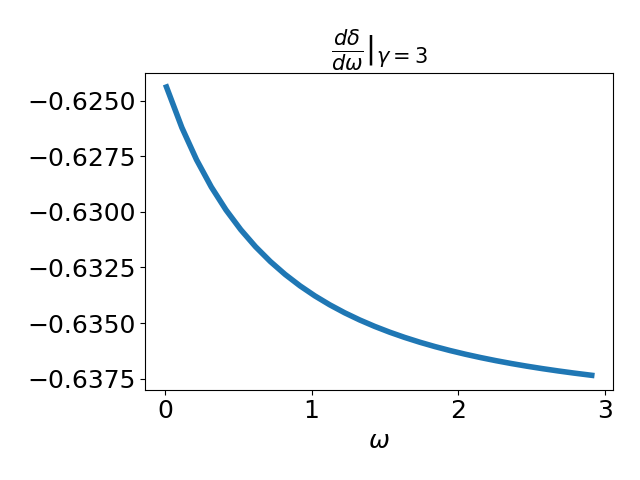

In [35]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
from scipy.interpolate import interp1d
smoother = interp1d(numpy.array(omega_list),
                    numpy.array(slope_list))
dense_omega_list = numpy.linspace(omega_list[0],omega_list[-1],10000)
pylab.plot(dense_omega_list,
           smoother(dense_omega_list), linewidth=4)
pylab.xlabel(r'$\omega$')
pylab.title(r'$\left.\frac{d \delta}{d \omega}\right|_{\gamma=3}$')
pylab.tight_layout()

In [26]:
delta_list = numpy.zeros_like(gamma_list)

Combine the below 2 cases into 1 case

In [24]:
gamma_list = numpy.array([1.1       , 1.53333333, 1.96666667, 2.4       , 2.83333333,
       3.26666667, 3.7       , 4.13333333, 4.56666667, 5.        ])
gamma_list = numpy.array([1.53333333, 1.96666667, 2.4       , 2.83333333,
       3.26666667, 3.7       , 4.13333333, 4.56666667, 5.        ])
#gamma_list = numpy.array([1.47111111])
delta_list = numpy.zeros_like(gamma_list)
for n, gamma_value in enumerate(gamma_list):
    function_for_bisection = lambda dvalue: overall_method(dvalue, gamma_value, 9)[1][-1] - float(C_shock_front.subs(gamma,gamma_value))
    delta_list[n] = scipy.optimize.bisect(function_for_bisection, -7,-5)
#gamma_value = 1.03
#function_for_bisection = lambda dvalue: overall_method(dvalue, gamma_value, 2.7)[1][-1] - float(C_shock_front.subs(gamma,gamma_value))
#delta_list[0] = scipy.optimize.bisect(function_for_bisection, -2.8,-2)

In [19]:
function_for_bisection = lambda dvalue: overall_method(dvalue, 5./3., 3)[1][-1] - float(C_shock_front.subs(gamma,5./3.))
delta = scipy.optimize.bisect(function_for_bisection, -6,-0.3) #adiabatic atmosphere, comparing to Almog and Chris's paper

In [20]:
delta

In [22]:
delta/(1+3)

In [25]:
delta_list

array([-6.92640793, -6.61551272, -6.45415751, -6.35389858, -6.28517821,
       -6.23500537, -6.19670943, -6.16649399, -6.14203258])

In [26]:
delta_list = numpy.array([-7.95014838,-6.92640793, -6.61551272, -6.45415751, -6.35389858, -6.28517821,
       -6.23500537, -6.19670943, -6.16649399, -6.14203258])

In [27]:
np.array([3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<IPython.core.display.Javascript object>


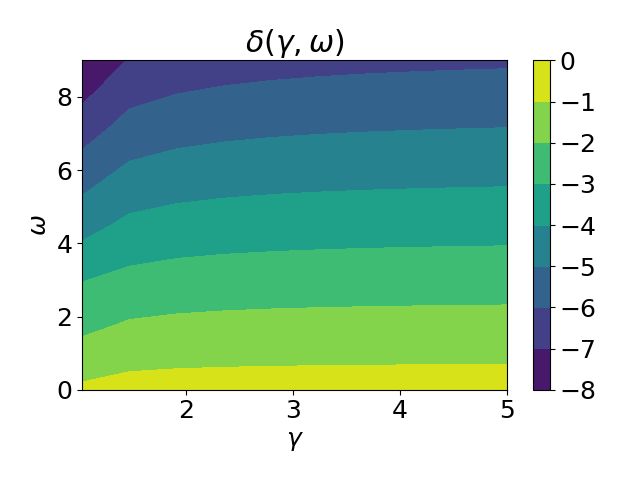

In [20]:
import numpy as np
import matplotlib.pyplot as plt
gamma = np.array([1.03      , 1.47111111, 1.91222222, 2.35333333, 2.79444444,
       3.23555556, 3.67666667, 4.11777778, 4.55888889, 5.        ])
omega = np.array([0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9])
X, Y = np.meshgrid(gamma, omega)
#Z = np.sqrt(X**2 + Y**2)
Z = np.array([[-0.825065  , -0.65630424, -0.62026053, -0.6054357 , -0.59575762,
               -0.58934375, -0.58477508, -0.58135267, -0.57869192, -0.57656338],
              [-1.57056437, -1.28514852, -1.21784049, -1.1852123,  -1.16568616, 
               -1.15262415, -1.14325091, -1.13618881, -1.1306731,  -1.12624412], 
              [-2.27275057, -1.91792056, -1.81823504, -1.76959291, -1.74032154,
               -1.72066271, -1.70651373, -1.69582885, -1.68746826, -1.68074477], 
              [-2.7671881,  -2.55189817, -2.42015644, -2.35559206, -2.31662467,
               -2.29039907, -2.27149416, -2.25720025, -2.24600474, -2.23699419],
              [-3.62602381, -3.1534129 , -3.01007757, -2.9361056 , -2.89031682,
               -2.85901789, -2.83621411, -2.818837  , -2.80514468, -2.79407199],
             [-4.34774742, -3.78190938, -3.61059756, -3.52203606,-3.46715325, 
              -3.42960691, -3.40223413, -3.38136497, -3.3649145, -3.35160696],
             [-5.06851026, -4.41061137, -4.21135328, -4.10821763, -4.04425011,
              -4.00046257,-3.96852521, -3.94416728, -3.92496117, -3.90942074],
             [-5.78901434, -5.03944688, -4.81226238, -4.69456284, -4.62151691,
              -4.5714924 , -4.53499346, -4.507149  , -4.48518899, -4.46741706],
             [-6.50942437, -5.66837399, -5.41327684, -5.28102062, -5.19890071,
              -5.14264222, -5.10158386, -5.07025448, -5.04554181, -5.02553938],
             [-7.2297951, -6.29736669, -6.01436681, -5.86755913, -5.77636849, 
              -5.71387823, -5.66826203, -5.63344892, -5.60598451, -5.58375231],
             [-7.95014838,-6.92640793, -6.61551272, -6.45415751, -6.35389858, 
              -6.28517821, -6.23500537, -6.19670943, -6.16649399, -6.14203258]])
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\delta(\gamma, \omega)$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$\omega$')
plt.show()
pylab.tight_layout()


<IPython.core.display.Javascript object>


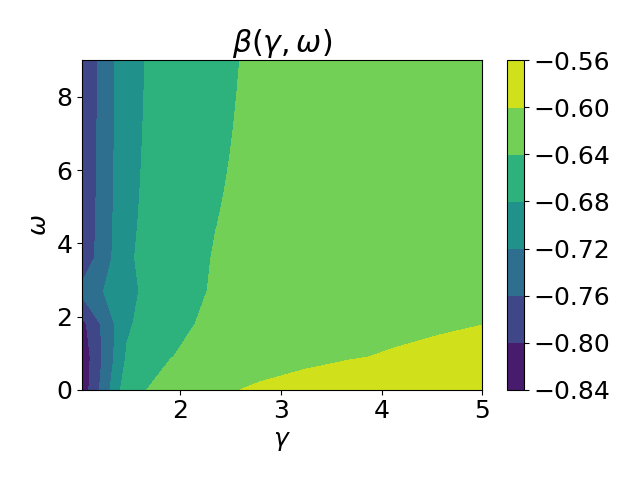

In [21]:
b = [] #beta 
for i in range(len(Z)):
    b.append(Z[i]/(omega[i] + 1))
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, b)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\beta(\gamma, \omega)$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$\omega$')
plt.show()
pylab.tight_layout()


In [ ]:
matplotlib.rcParams.update({'font.size': 18})
pylab.plot(omega_list, delta_list, '.')
pylab.xlabel(r'$\omega$')
pylab.ylabel(r'$\delta$')
pylab.title(r'$\gamma = 3$')
pylab.tight_layout()
pylab.savefig("gamma=3")

# Infinite $\gamma$

The problem with the limit $\gamma \rightarrow \infty$ is that $\tilde{V}$ changes over a very narrow range. If we define a new variable $W = \gamma V$, when the integration domain of this new variable remains finite in the limit $\gamma \rightarrow \infty$. The derivative in terms of the new variable is

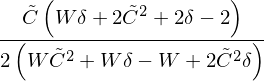

In [16]:
W = sympy.Symbol('W', positive=True)
temp = dCdV
temp = temp.subs(V_tilde,W/gamma)
temp = sympy.series(temp,gamma,sympy.oo,0)
temp = temp.removeO()
temp = temp/gamma
temp = temp.simplify()
dCdW = temp
dCdW.subs(omega, 0)

In [17]:
sympy.latex(dCdW)

'\\frac{\\tilde{C} \\left(W \\delta + \\tilde{C}^{2} \\omega + 2 \\tilde{C}^{2} + 2 \\delta - 2\\right)}{2 \\left(W \\tilde{C}^{2} + W \\delta - W + 2 \\tilde{C}^{2} \\delta + \\tilde{C}^{2} \\omega\\right)}'

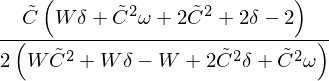

In [18]:
dCdW

In [19]:
dCdW.subs(delta,0).subs(omega, 0).simplify()

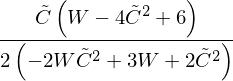

In [20]:
dCdW.subs(delta,sympy.Rational(-1,2)).subs(omega, 0).simplify()

Slope at the sonic point

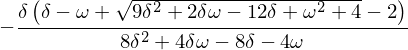

In [21]:
beta = sympy.Symbol('beta', positive=True) # Slope
temp = dCdV.subs(C_tilde,C_sonic+alpha*DeltaV)
temp = temp.subs(V_tilde, V_sonic+DeltaV)
temp = sympy.fraction(temp)
temp = [sympy.diff(temp[0],DeltaV,2).subs(DeltaV,0).simplify(),
        sympy.diff(temp[1],DeltaV,2).subs(DeltaV,0).simplify()]
temp = temp[0]/temp[1]
temp = temp.subs(alpha, gamma*beta)
temp = temp/gamma
temp = temp.series(gamma,sympy.oo,1)
temp = temp.removeO()
temp = temp.simplify()
temp = sympy.solve(temp-beta,beta)[1]
infinite_gamma_sonic_slope = temp
infinite_gamma_sonic_slope

In [22]:
sympy.latex(infinite_gamma_sonic_slope)

'- \\frac{\\delta \\left(\\delta - \\omega + \\sqrt{9 \\delta^{2} + 2 \\delta \\omega - 12 \\delta + \\omega^{2} + 4} - 2\\right)}{8 \\delta^{2} + 4 \\delta \\omega - 8 \\delta - 4 \\omega}'

omega = 0 case:

In [ ]:
"""
def infinite_gamma_shoot_forward(dvalue):
        
    sonic_slope = infinite_gamma_sonic_slope.subs({omega:0,delta:dvalue})
    dV_init = 1e-3
    W_start = -2.0 + dV_init
    C_start = 1.0 + dV_init * float(sonic_slope)
    w_list = numpy.linspace(W_start, 2, 100000)
    c_list = C_start*numpy.ones_like(w_list)
    
    deriv = dCdW.subs({omega:0,delta:dvalue})
    wrapper = sympy.lambdify([W,C_tilde], deriv)
    
    for n in range(1,len(w_list)):
        delta_w = w_list[n] - w_list[n-1]
        c_list[n] = c_list[n-1] + delta_w*wrapper(w_list[n-1], c_list[n-1])
            
    return numpy.vstack((w_list, c_list))
"""

Any omega case:

In [23]:
def infinite_gamma_shoot_forward(ovalue, dvalue):
        
    sonic_slope = infinite_gamma_sonic_slope.subs({omega:ovalue,delta:dvalue})
    dV_init = 1e-3
    W_start = -2.0 - ovalue/dvalue + dV_init
    C_start = 1.0 + dV_init * float(sonic_slope)
    w_list = numpy.linspace(W_start, 2, 100000)
    c_list = C_start*numpy.ones_like(w_list)
    
    deriv = dCdW.subs({omega:ovalue,delta:dvalue})
    wrapper = sympy.lambdify([W,C_tilde], deriv)
    
    for n in range(1,len(w_list)):
        delta_w = w_list[n] - w_list[n-1]
        c_list[n] = c_list[n-1] + delta_w*wrapper(w_list[n-1], c_list[n-1])
            
    return numpy.vstack((w_list, c_list))
"""
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-0.6,-0.5,5):
    temp = infinite_gamma_shoot_forward(0, dvalue)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], numpy.ones_like(temp[0]), 'k', linewidth=4)
pylab.scatter([2],
           [numpy.sqrt(2.0)], c='k', marker='o', s=50, label='front')
pylab.legend(loc='best')
pylab.xlabel('W')
pylab.ylabel('C')
pylab.title(r'$\gamma\rightarrow\infty$')
pylab.tight_layout()
pass
"""

'\n%matplotlib notebook\nmatplotlib.rcParams.update({\'font.size\': 18})\nfor dvalue in numpy.linspace(-0.6,-0.5,5):\n    temp = infinite_gamma_shoot_forward(0, dvalue)\n    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))\npylab.plot(temp[0], numpy.ones_like(temp[0]), \'k\', linewidth=4)\npylab.scatter([2],\n           [numpy.sqrt(2.0)], c=\'k\', marker=\'o\', s=50, label=\'front\')\npylab.legend(loc=\'best\')\npylab.xlabel(\'W\')\npylab.ylabel(\'C\')\npylab.title(r\'$\\gamma\rightarrow\\infty$\')\npylab.tight_layout()\npass\n'

<IPython.core.display.Javascript object>


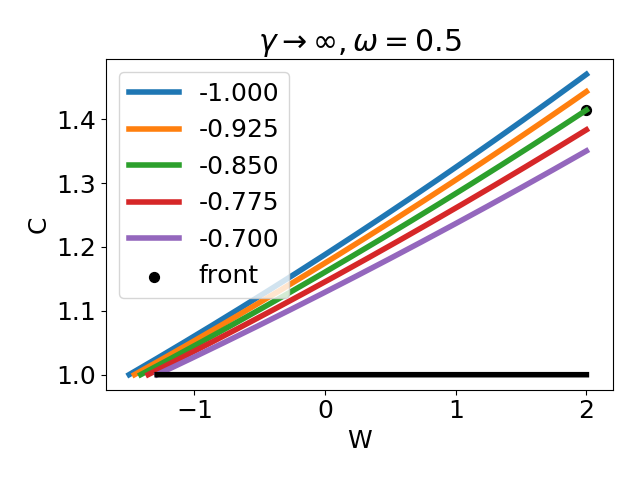

In [35]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
for dvalue in numpy.linspace(-1,-0.7,5):
    temp = infinite_gamma_shoot_forward(0.5, dvalue)
    pylab.plot(temp[0], temp[1], linewidth=4, label="{:1.3f}".format(dvalue))
pylab.plot(temp[0], numpy.ones_like(temp[0]), 'k', linewidth=4)
pylab.scatter([2],
           [numpy.sqrt(2.0)], c='k', marker='o', s=50, label='front')
pylab.legend(loc='best')
pylab.xlabel('W')
pylab.ylabel('C')
pylab.title(r'$\gamma\rightarrow\infty, \omega = 0.5$')
pylab.tight_layout()
pass

In [30]:
numpy.linspace(0, 5, 10)

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

Determining $\lim_{\gamma\rightarrow \infty} \delta(\omega, \gamma)$

In [31]:
#function_for_bisection = lambda dvalue: infinite_gamma_shoot_forward(0, dvalue)[1][-1] - numpy.sqrt(2)
#infinite_gamma_delta = scipy.optimize.bisect(function_for_bisection, -0.6,-0.5)
#infinite_gamma_delta

In [31]:
delta_list1 = numpy.array([-0.5573297792501535, -0.8824612649490291, -1.210221855720306, -1.5392806294706816, -1.8690740095818228, -2.1993229984640266, -2.5298738542240926, -2.8606349496659504, -3.191548303404147, -3.522575444772542])
delta_list2 = numpy.array([-0.5864160479453631, -0.9118812310429121, -1.2397955619782124, -1.5689374230709063, -1.898780673498436, -2.2290619033445864, -2.559634789664301, -2.890411598518426, -3.2213365498924986, -3.552372493460439])

In [32]:
slope_list = (delta_list2 - delta_list1)/0.05

In [44]:
omega_list = numpy.linspace(0, 1, 20)
delta_list = []

for i in omega_list:
    print(i)
    function_for_bisection = lambda dvalue: infinite_gamma_shoot_forward(i + 0.05, dvalue)[1][-1] - numpy.sqrt(2)
    infinite_gamma_delta = scipy.optimize.bisect(function_for_bisection, -5,-0.5)
    delta_list.append(infinite_gamma_delta)
    print(infinite_gamma_delta)
    
print(delta_list)

0.0
-0.5864160479453631
0.05263157894736842
-0.617080456871804
0.10526315789473684
-0.6477891664218305
0.15789473684210525
-0.678538386876312
0.21052631578947367
-0.7093247462504451
0.2631578947368421
-0.7401452345835651
0.3157894736842105
-0.7709971568809806
0.3684210526315789
-0.8018780931607807
0.42105263157894735
-0.8327858644084927
0.47368421052631576
-0.863718503440964
0.5263157894736842
-0.8946742298916206
0.5789473684210527
-0.9256514286336142
0.631578947368421
-0.9566486311149447
0.6842105263157894
-0.9876644991717285
0.7368421052631579
-1.0186978109164784
0.7894736842105263
-1.0497474484210443
0.8421052631578947
-1.0808123869322799
0.894736842105263
-1.1118916853953351
0.9473684210526315
-1.1429844780983558
1.0
-1.1740899673158083
[-0.5864160479453631, -0.617080456871804, -0.6477891664218305, -0.678538386876312, -0.7093247462504451, -0.7401452345835651, -0.7709971568809806, -0.8018780931607807, -0.8327858644084927, -0.863718503440964, -0.8946742298916206, -0.9256514286336142,

In [46]:
omega_list = numpy.array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])
delta_list = numpy.array([-0.5864160479453631, -0.617080456871804, -0.6477891664218305, -0.678538386876312, -0.7093247462504451, -0.7401452345835651, -0.7709971568809806, -0.8018780931607807, -0.8327858644084927, -0.863718503440964, -0.8946742298916206, -0.9256514286336142, -0.9566486311149447, -0.9876644991717285, -1.0186978109164784, -1.0497474484210443, -1.0808123869322799, -1.1118916853953351, -1.1429844780983558, -1.1740899673158083])

In [45]:
omega_list

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [33]:
omega_list2[2:]

array([1.11111111, 1.66666667, 2.22222222, 2.77777778, 3.33333333,
       3.88888889, 4.44444444, 5.        ])

In [27]:
omega_list2 = numpy.linspace(0, 5, 10)
delta_list2 = numpy.array([-0.5864160479453631, -0.9118812310429121, -1.2397955619782124, -1.5689374230709063, -1.898780673498436, -2.2290619033445864, -2.559634789664301, -2.890411598518426, -3.2213365498924986, -3.552372493460439])

In [47]:
total_omega = numpy.concatenate([omega_list, omega_list2[2:]])
total_delta = numpy.concatenate([delta_list, delta_list2[2:]])

In [48]:
total_omega

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ,
       1.11111111, 1.66666667, 2.22222222, 2.77777778, 3.33333333,
       3.88888889, 4.44444444, 5.        ])

<IPython.core.display.Javascript object>


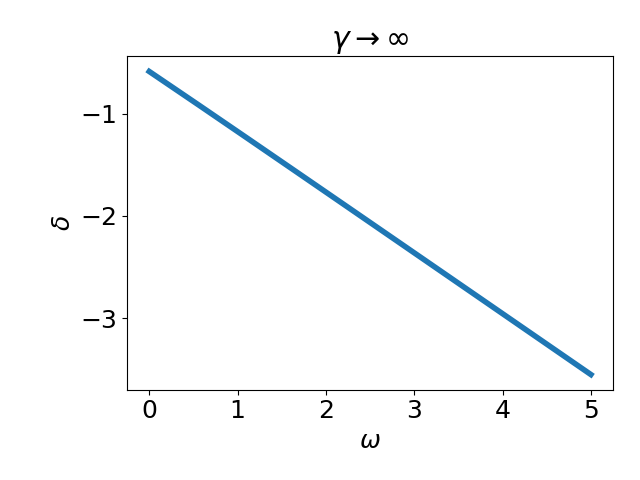

In [7]:
%matplotlib notebook
pylab.plot(omega_list, delta_list, linewidth=4)
pylab.xlabel(r'$\omega$')
pylab.ylabel(r'$\delta$')
pylab.title(r'$\gamma\rightarrow\infty$')
pylab.tight_layout()
pass

In [49]:
beta_list = total_delta/(1+total_omega)

<IPython.core.display.Javascript object>


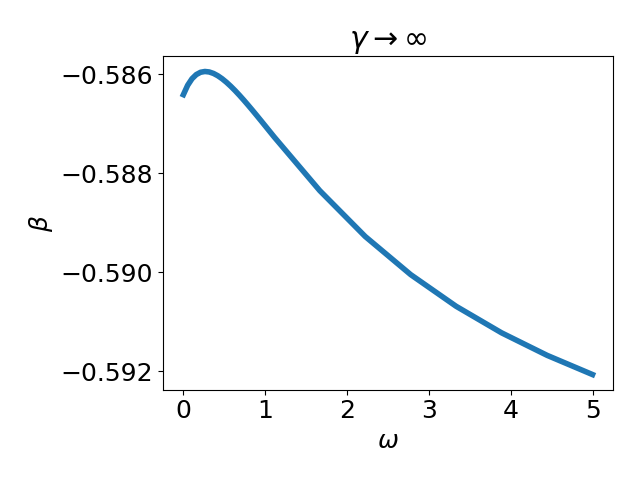

In [52]:
%matplotlib notebook
pylab.plot(total_omega, beta_list, linewidth=4)
pylab.xlabel(r'$\omega$')
pylab.ylabel(r'$\beta$')
pylab.title(r'$\gamma\rightarrow\infty$')
pylab.tight_layout()
pass

In [ ]:

omega_list =  numpy.arange(1,5,0.2) 
delta_list = []
"""
for i in omega_list:
    function_for_bisection = lambda dvalue: infinite_gamma_shoot_forward(i, dvalue)[1][-1] - numpy.sqrt(2)
    infinite_gamma_delta = scipy.optimize.bisect(function_for_bisection, -5,-0.5)
    delta_list.append(infinite_gamma_delta)
    print(infinite_gamma_delta)
    
print(delta_list)
"""
for omega in omega_list:
    function_for_bisection = lambda dvalue: infinite_gamma_shoot_forward(omega, dvalue)[1][-1] - numpy.sqrt(2)
    delta_list.append(scipy.optimize.bisect(function_for_bisection, -5,-0.5))
    function_for_bisection = lambda dvalue: infinite_gamma_shoot_forward(omega + 0.05, dvalue)[1][-1] - numpy.sqrt(2)
    delta_list.append(scipy.optimize.bisect(function_for_bisection, -5,-0.5))
    print(infinite_gamma_delta)

In [88]:
len(delta_list)

In [89]:
slope_list = []
for i in range(30):
    slope = (delta_list[2*i + 1] - delta_list[2*i])/0.05
    slope_list.append(slope)
slope_list

IndexError: list index out of range

<IPython.core.display.Javascript object>


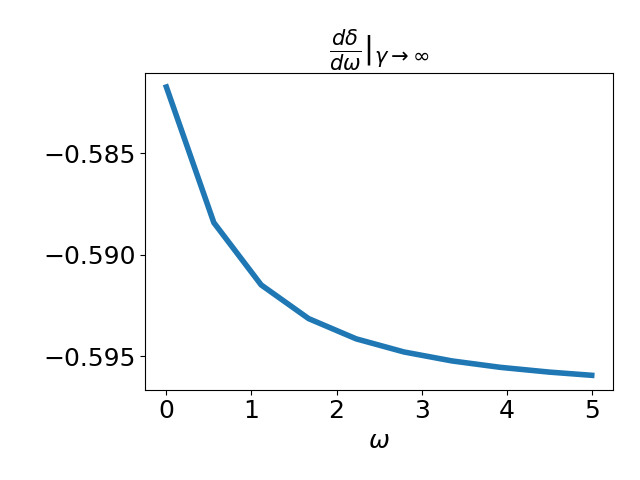

In [33]:
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 18})
from scipy.interpolate import interp1d
smoother = interp1d(numpy.array(omega_list),
                    numpy.array(slope_list))
dense_omega_list = numpy.linspace(omega_list[0],omega_list[-1],10000)
pylab.plot(dense_omega_list,
           smoother(dense_omega_list), linewidth=4)
pylab.xlabel(r'$\omega$')
pylab.title(r'$\left.\frac{d \delta}{d \omega}\right|_{\gamma\rightarrow\infty}$')
pylab.tight_layout()

# Infinite $\omega$


In [ ]:
temp = dCdV
temp = sympy.series(temp,omega,sympy.oo,1)
temp = temp.removeO()
temp = temp.simplify()
dCdV_w = temp
#dCdV_w.subs(omega, 0)
dCdV_w #no delta...

In [ ]:
temp = dCdV #look at slope at sonic point for large omega...
temp = temp.subs(C_tilde, C_sonic + 1e-3).subs(V_tilde, V_sonic + 1e-3).subs(omega, 1).subs(gamma, 7./5.)
temp = temp.simplify()
temp

In [ ]:
temp = dCdV
deriv_delta = temp.diff(delta)
deriv_delta = deriv_delta.subs({V_tilde:0.3, C_tilde:0.3}).subs({omega:3000, gamma:7./5.}).subs(delta, -0.5)
deriv_delta

In [ ]:
temp = C_sonic
temp = temp.subs(omega, 10).subs(gamma, 7./5.).subs(delta, -2)
temp

In [ ]:
#beta = sympy.Symbol('beta', positive=True) # Slope
temp = dCdV.subs(C_tilde,C_sonic+alpha*DeltaV)
temp = temp.subs(V_tilde, V_sonic+DeltaV)
temp = sympy.fraction(temp)
temp = [sympy.diff(temp[0],DeltaV,2).subs(DeltaV,0).simplify(),
        sympy.diff(temp[1],DeltaV,2).subs(DeltaV,0).simplify()]
temp = temp[0]/temp[1]
temp = temp.series(omega,sympy.oo,1)
temp = temp.removeO()
temp = temp.simplify()
temp = sympy.solve(temp-alpha,alpha)
infinite_omega_sonic_slope = temp
infinite_omega_sonic_slope

In [ ]:
def infinite_omega_shoot_forward(gvalue, dvalue):
        
    sonic_slope = infinite_omega_sonic_slope.subs({gamma:gvalue})
    dV_init = 1e-3
    V_start = 1/dvalue + dV_init
    C_start = dV_init * float(sonic_slope)
    v_list = numpy.linspace(V_start, 2, 100000)
    c_list = C_start*numpy.ones_like(w_list)
    
    deriv = dCdV_w.subs({gamma:g_value})
    wrapper = sympy.lambdify([W,C_tilde], deriv)
    
    for n in range(1,len(w_list)):
        delta_w = w_list[n] - w_list[n-1]
        c_list[n] = c_list[n-1] + delta_w*wrapper(w_list[n-1], c_list[n-1])
            
    return numpy.vstack((w_list, c_list))



# Contour Plots

<IPython.core.display.Javascript object>


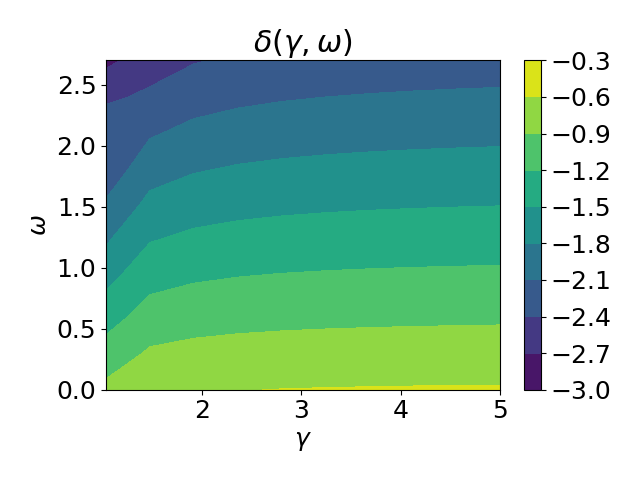

In [24]:
import numpy as np
import matplotlib.pyplot as plt
gamma = np.array([1.03      , 1.47111111, 1.91222222, 2.35333333, 2.79444444,
       3.23555556, 3.67666667, 4.11777778, 4.55888889, 5.        ])
omega = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7])
X, Y = np.meshgrid(gamma, omega)
#Z = np.sqrt(X**2 + Y**2)
Z = np.array([[-0.825065  , -0.65630424, -0.62026053, -0.6054357 , -0.59575762,
       -0.58934375, -0.58477508, -0.58135267, -0.57869192, -0.57656338],
              [-1.07575017, -0.8631977, -0.8195817, -0.79774982, -0.78477108,
       -0.77613474, -0.76996197, -0.76532555, -0.76171328, -0.75881853],
              [-1.32452861, -1.07357921, -1.01839652, -0.99114507, -0.97488578, -0.96403322,
 -0.9562584,  -0.95040812, -0.94584359, -0.94218144],
              [-1.57056437, -1.28514852, -1.21784049, -1.1852123,  -1.16568616, -1.15262415,
 -1.14325091, -1.13618881, -1.1306731,  -1.12624412], 
              [-1.81260904, -1.4958869,  -1.41770594, -1.37972455, -1.35694223, -1.34167669,
 -1.33070861, -1.32243694, -1.31597155, -1.31077673], 
              [-2.0484103,  -1.70681967, -1.61786458, -1.57454659, -1.54851645, -1.53105228,
 -1.51849245, -1.50901328, -1.50159966, -1.49564002], 
              [-2.27275057, -1.91792056, -1.81823504, -1.76959291, -1.74032154, -1.72066271,
 -1.70651373, -1.69582885, -1.68746826, -1.68074477], 
              [-2.15665052, -2.1291521,  -2.01876343, -1.96480677, -1.93229942, -1.91044917,
 -1.8947132,  -1.88282411, -1.87351766, -1.86603114], 
              [-2.4624442,  -2.34048516, -2.21941266, -2.1601491,  -2.12441,    -2.10037098,
 -2.08304979, -2.06995777, -2.05970639, -2.05145755], 
              [-2.7671881,  -2.55189817, -2.42015644, -2.35559206, -2.31662467, -2.29039907,
 -2.27149416, -2.25720025, -2.24600474, -2.23699419]])
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\delta(\gamma, \omega)$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$\omega$')
plt.show()
pylab.tight_layout()
plt.savefig("Delta_plot.PNG")

<IPython.core.display.Javascript object>


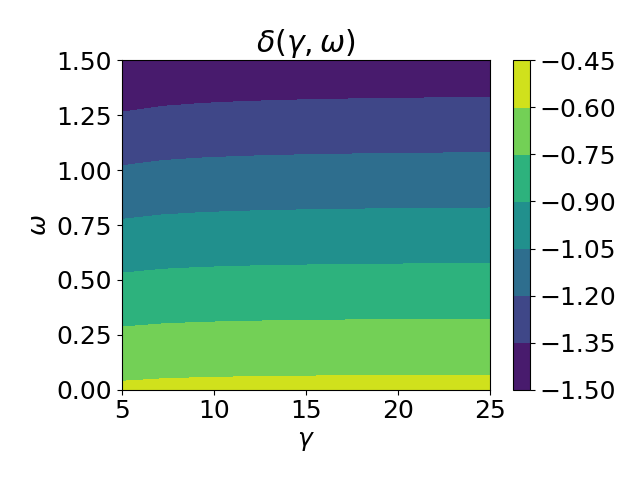

In [25]:
import numpy as np #large gamma
import matplotlib.pyplot as plt
gamma = numpy.linspace(5,25,10)
omega = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5])
X, Y = np.meshgrid(gamma, omega)
#Z = np.sqrt(X**2 + Y**2)
Z = np.array([[-0.57656338, -0.57014124, -0.56693688, -0.56501549, -0.56373486, -0.5628202,
 -0.56213422, -0.56160067, -0.56117383, -0.56082459],
              [-0.75881853, -0.75005621, -0.74566743, -0.74303022, -0.74127007, -0.74001173,
 -0.73906732, -0.73833238, -0.73774417, -0.73726273],
              [-0.94218144, -0.93107187, -0.92549294, -0.92213566, -0.91989283, -0.91828835,
 -0.91708359, -0.91614569, -0.91539481, -0.91478008],
              [-1.12624412, -1.11278699, -1.1060165,  -1.10193787, -1.09921128, -1.0972598,
 -1.09579397, -1.09465252, -1.09373849, -1.09299005], 
              [-1.31077673, -1.2949739,  -1.28701201, -1.28221184, -1.27900124, -1.27670253,
 -1.27497541, -1.27363022, -1.27255286, -1.27167057],
              [-1.49564002, -1.47749388, -1.4683413,  -1.46281985, -1.45912533, -1.45647939,
 -1.45449098, -1.45294202, -1.45170131, -1.45068514]])
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\delta(\gamma, \omega)$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$\omega$')
plt.show()
pylab.tight_layout()
plt.savefig("Large_gamma.PNG")

<IPython.core.display.Javascript object>


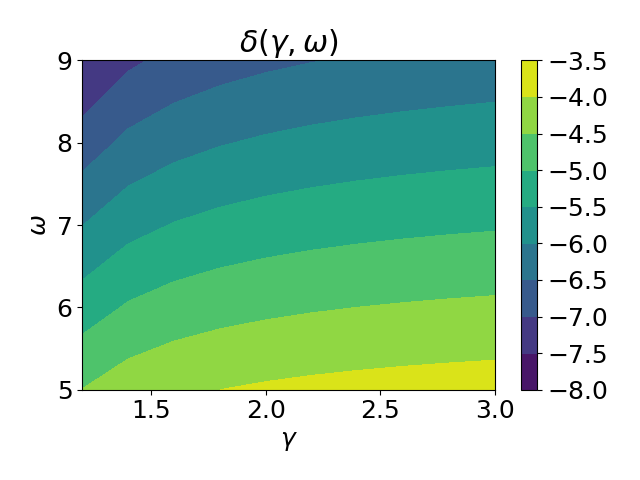

In [26]:
import numpy as np #large omega
import matplotlib.pyplot as plt
gamma = numpy.array([1.2, 1.4, 1.6, 1.8, 2.,  2.2, 2.4, 2.6, 2.8, 3. ])
omega = np.array([5,6,7,8,9])
X, Y = np.meshgrid(gamma, omega)
#Z = np.sqrt(X**2 + Y**2)
Z = np.array([[-4.49199985, -4.23258323, -4.09145603, -3.99986388, -3.93480518, -3.88590301,
 -3.84766822, -3.81688643, -3.79153577, -3.77027455],
              [-5.25000862, -4.94797552, -4.7835378,  -4.67673842, -4.6008327,  -4.54374939,
 -4.49909992, -4.46314145, -4.43351871, -4.40866815],
              [-6.00809588, -5.66348522, -5.47575166, -5.35375443, -5.26700837, -5.20174899,
 -5.15068878, -5.1095568,  -5.07566457, -5.04722683],
              [-6.76623891, -6.37907492, -6.16805546, -6.03086681, -5.93328506, -5.8598531,
 -5.80238491, -5.75608163, -5.71792171, -5.68589832], 
              [-7.52442262, -7.09472156, -6.86042326, -6.70804782, -6.5996337,  -6.5180317,
 -6.45415751, -6.40268453, -6.36025825, -6.32465029]])
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title(r'$\delta(\gamma, \omega)$')
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel(r'$\omega$')
plt.show()
pylab.tight_layout()
plt.savefig("Large_omega.PNG")